# CRYPTO CURRENCY: EDA AND PREDICTION

In [1]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
# importing pandas datareader 
import pandas_datareader
from pandas_datareader import data
import pandas_datareader.data as pdr

In [3]:
end=datetime.today()
#ten years back 
start=datetime(end.year-10,end.month,end.day)
#bitcoin prices to be imported for the last ten years
BTC=pdr.DataReader('BTC-USD','yahoo',start,end)

In [4]:
BTC.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-09-28,42545.257812,40829.667969,41064.984375,41564.363281,3.060236e+10,41564.363281
2021-09-29,44092.601562,41444.582031,41551.269531,43790.894531,3.114168e+10,43790.894531
2021-09-30,48436.011719,43320.023438,43816.742188,48116.941406,4.285064e+10,48116.941406
2021-10-01,48282.062500,47465.496094,48137.468750,47711.488281,3.061435e+10,47711.488281
2021-10-03,48111.664062,47196.386719,47792.492188,48077.957031,2.834255e+10,48077.957031


## PART 1

In [5]:
import pandas_datareader.data as web

In [6]:
#importing values Bitcoin(BTC), Litecoin(LTC) and Ethereum(ETH) the dataset
dt=web.get_data_yahoo(['BTC-USD','LTC-USD','ETH-USD'],'01/01/2014',interval='m')

In [7]:
#scraping yahoo data
dt.head()

Attributes   Adj Close                        Close                   \
Symbols        BTC-USD  LTC-USD ETH-USD     BTC-USD  LTC-USD ETH-USD   
Date                                                                   
2014-09-30  338.321014  3.75400     NaN  338.321014  3.75400     NaN   
2014-11-01  378.046997  3.57609     NaN  378.046997  3.57609     NaN   
2014-12-01  320.192993  2.71893     NaN  320.192993  2.71893     NaN   
2015-01-01  217.464005  1.87350     NaN  217.464005  1.87350     NaN   
2015-02-01  254.263000  1.84073     NaN  254.263000  1.84073     NaN   

Attributes        High                          Low                   \
Symbols        BTC-USD  LTC-USD ETH-USD     BTC-USD  LTC-USD ETH-USD   
Date                                                                   
2014-09-30  411.697998  4.50374     NaN  289.295990  3.48060     NaN   
2014-11-01  457.092987  4.35022     NaN  320.626007  3.48041     NaN   
2014-12-01  384.037994  3.76522     NaN  304.231995  2.66743     NaN   
2015-01-01  320.434998  2.72421     NaN  171.509995  1.11374     NaN   
2015-02-01  265.610992  2.02953     NaN  212.014999  1.67915     NaN   

Attributes        Open                         Volume                       
Symbols        BTC-USD  LTC-USD ETH-USD       BTC-USD      LTC-USD ETH-USD  
Date                                                                        
2014-09-30  387.427002  4.47096     NaN  9.029944e+08  120987520.0     NaN  
2014-11-01  338.649994  3.75666     NaN  6.597334e+08  102499340.0     NaN  
2014-12-01  378.248993  3.57559     NaN  5.531023e+08   71412500.0     NaN  
2015-01-01  320.434998  2.72421     NaN  1.098812e+09   99981256.0     NaN  
2015-02-01  216.867004  1.87878     NaN  7.115187e+08   51523802.0     NaN

In [8]:
import seaborn as sns
ticker=['BTC-USD','LTC-USD','ETH-USD']

<Figure size 1080x576 with 0 Axes>

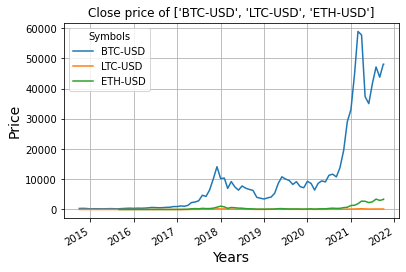

In [9]:
plt.figure(figsize=(15,8))
dt['Close'].plot()
plt.title(f'Close price of {ticker}')
plt.ylabel('Price',fontsize=14)
plt.xlabel('Years',fontsize=14)
plt.grid(which='major')

<Figure size 1080x576 with 0 Axes>

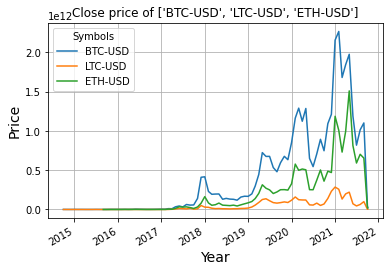

In [10]:
plt.figure(figsize=(15,8))
dt['Volume'].plot()
plt.title(f'Close price of {ticker}')
plt.ylabel('Price',fontsize=14)
plt.xlabel('Year',fontsize=14)
plt.grid(which='major')
plt.savefig('crypto_1.png',bbox_inches='tight')

In [11]:
#proportions of trading which exceeded 2 standard deviations

In [12]:
BTC.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2014-09-16,468.174011,452.421997,465.864014,457.334015,21056800.0,457.334015
2014-09-17,456.859985,413.104004,456.859985,424.440002,34483200.0,424.440002
2014-09-18,427.834991,384.532013,424.102997,394.795990,37919700.0,394.795990
2014-09-19,423.295990,389.882996,394.673004,408.903992,36863600.0,408.903992
2014-09-20,412.425995,393.181000,408.084991,398.821014,26580100.0,398.821014


In [13]:
high=BTC['Volume'].mean()+2*BTC['Volume'].std()

In [14]:
len(BTC[BTC.Volume > high])/len(BTC)

0.0490272373540856

<AxesSubplot:>

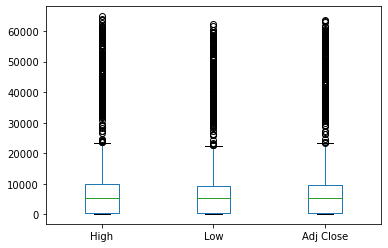

In [15]:
BTC[['High','Low','Adj Close']].plot.box()

In [16]:
BTC['Percent_Change']=BTC.Close.pct_change()

In [17]:
BTC['Percent_Change'].head()

Date
2014-09-16         NaN
2014-09-17   -0.071926
2014-09-18   -0.069843
2014-09-19    0.035735
2014-09-20   -0.024659
Name: Percent_Change, dtype: float64

In [18]:
#measuring daily volatility

In [19]:
h=BTC['Percent_Change'].mean()+2*BTC['Percent_Change'].std()

In [20]:
len(BTC[BTC.Percent_Change>high])/len(BTC)

0.0

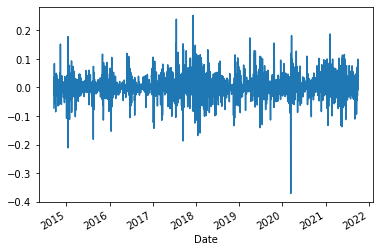

In [21]:
BTC['Percent_Change'].plot()
plt.show()

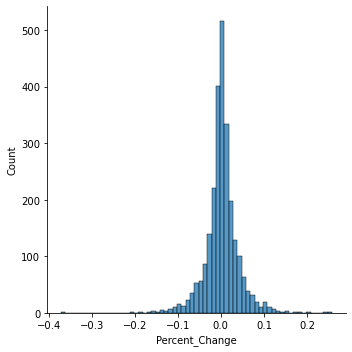

In [22]:
sns.displot(BTC, x='Percent_Change',binwidth=0.01)

In [23]:
#monthly mean from dataset

In [24]:
BTC1=BTC.Close.resample('M').mean()

In [25]:
BTC1.head(5)

Date
2014-09-30    405.611265
2014-10-31    363.500002
2014-11-30    366.099799
2014-12-31    341.267871
2015-01-31    248.782547
Freq: M, Name: Close, dtype: float64

In [26]:
import yfinance as yf

In [27]:
BTCy=yf.Ticker('BTC-USD')

In [28]:
hist=BTCy.history(period='max')

In [29]:
hist.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2021-09-29,41064.984375,42545.257812,40829.667969,41564.363281,30602359905,0,0
2021-09-30,41551.269531,44092.601562,41444.582031,43790.894531,31141681925,0,0
2021-10-01,43816.742188,48436.011719,43320.023438,48116.941406,42850641582,0,0
2021-10-02,48137.468750,48282.062500,47465.496094,47711.488281,30614346492,0,0
2021-10-03,47792.492188,48111.664062,47196.386719,48077.957031,28342548480,0,0


In [30]:
import mplfinance as mpf

In [31]:
import mplfinance as fplt

In [32]:
LTCyf=yf.download('LTC-USD',start='2016-12-01',end='2021-08-01')
LTCyf.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-11-30,3.88781,3.91850,3.88235,3.89379,3.89379,1857280
2016-12-01,3.90945,3.91855,3.89495,3.90908,3.90908,1985600
2016-12-02,3.91922,3.96133,3.91673,3.94644,3.94644,2559070
2016-12-03,3.94960,3.95487,3.91369,3.92400,3.92400,1805780
2016-12-04,3.93236,3.94512,3.89647,3.89961,3.89961,1908090


In [33]:
LTCyf1=yf.download('LTC-USD',start='2021-05-01',end='2021-08-01')
LTCyf1.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-04-30,255.450577,273.245026,252.887817,271.167084,271.167084,3898872713
2021-05-01,271.142670,278.219421,266.631409,276.833527,276.833527,3611805752
2021-05-02,276.960419,277.483459,265.335724,269.104370,269.104370,3118501264
2021-05-03,269.008301,299.300537,268.728973,294.704010,294.704010,5172505234
2021-05-04,294.774261,326.888672,275.464966,306.234497,306.234497,11541253990


C:\Users\sanyalam\Anaconda3\lib\site-packages\mplfinance\_arg_validators.py:35: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


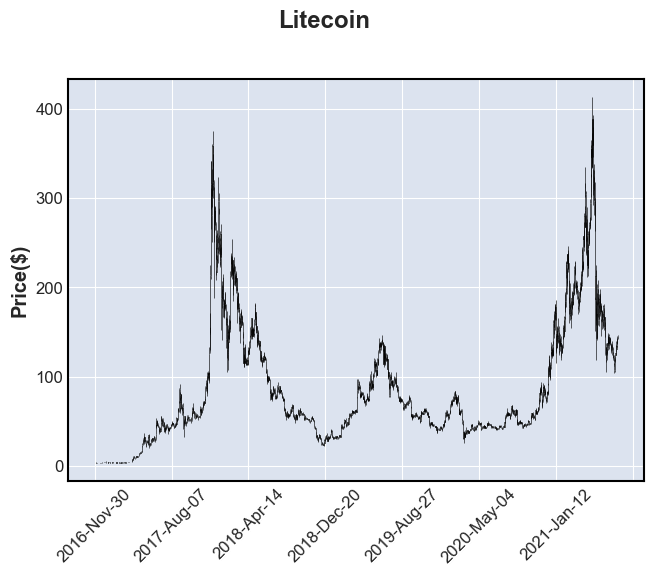

In [34]:
mpf.plot(
    LTCyf,
    type='candle',
    title='Litecoin',
    ylabel='Price($)'
    
)

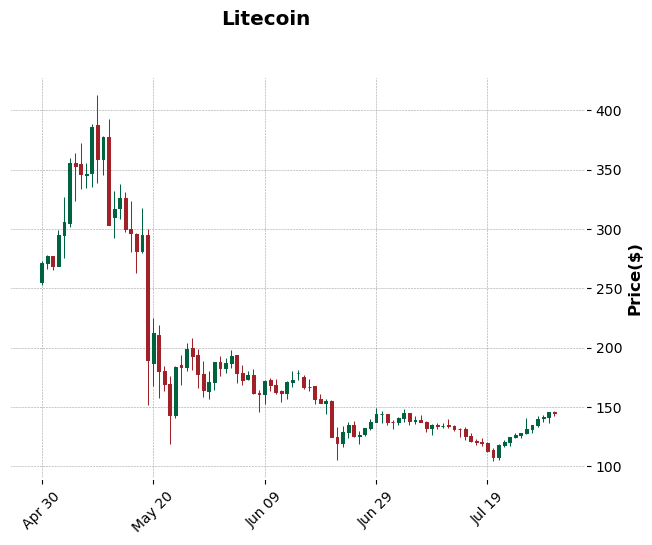

In [35]:
fplt.plot(
    LTCyf1,
    type='candle',
    title='Litecoin',
    style='charles',
    ylabel='Price($)'
    )

In [36]:
BTCyf1=yf.download('BTC-USD',start='2021-05-01',end='2021-08-01')
BTCyf1.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-04-30,53568.664062,57900.718750,53129.601562,57750.175781,57750.175781,52395931985
2021-05-01,57714.664062,58448.339844,57052.273438,57828.050781,57828.050781,42836427360
2021-05-02,57825.863281,57902.593750,56141.906250,56631.078125,56631.078125,38177405335
2021-05-03,56620.273438,58973.308594,56590.871094,57200.292969,57200.292969,51713139031
2021-05-04,57214.179688,57214.179688,53191.425781,53333.539062,53333.539062,68564706967


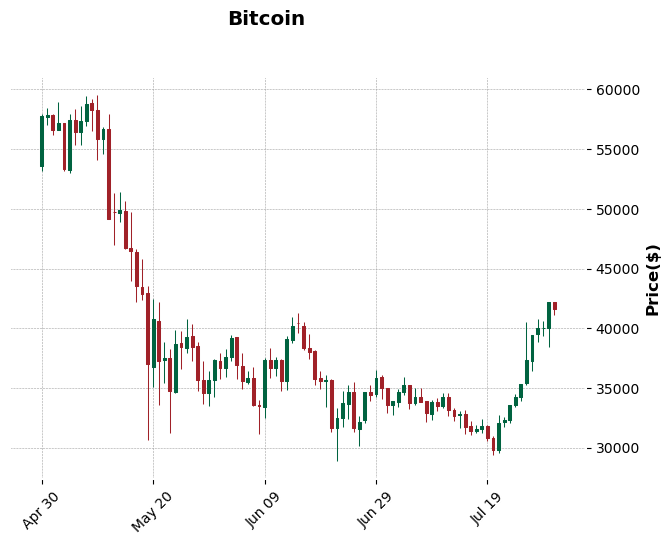

In [37]:
fplt.plot(
    BTCyf1,
    type='candle',
    title='Bitcoin',
    style='charles',
    ylabel='Price($)'
    )

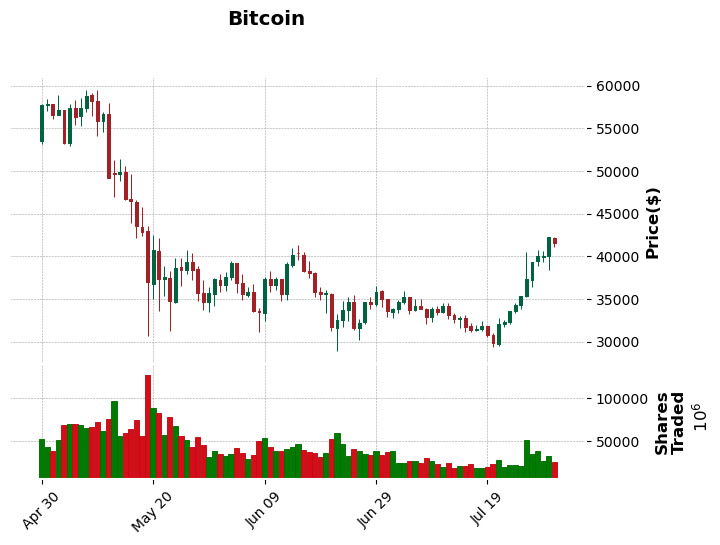

<Figure size 640x480 with 0 Axes>

In [44]:
fplt.plot(
    BTCyf1,
    type='candle',
    title='Bitcoin',
    style='charles',
    ylabel='Price($)',
    volume=True,
    ylabel_lower='Shares\nTraded'
    )
plt.savefig('crypto_2.png',bbox_inches='tight')

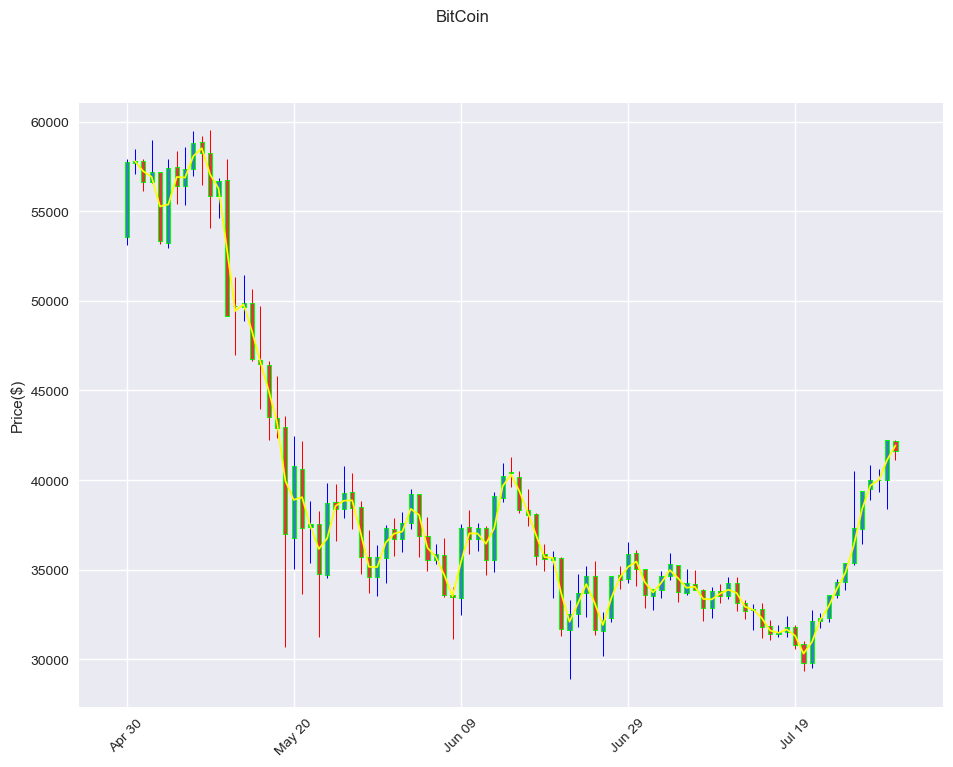

<Figure size 800x550 with 0 Axes>

In [42]:
mc=fplt.make_marketcolors(
    up='tab:blue',down='tab:red',
    edge='lime',
    wick={'up':'blue','down':'red'},
    volume='lawngreen',
    )
s=fplt.make_mpf_style(base_mpl_style='seaborn',marketcolors=mc,mavcolors=['yellow'])
fplt.plot(
    BTCyf1,
    type='candle',
    title='BitCoin',
    ylabel='Price($)',
    mav=2,
    figscale=1.5,
    style=s
    
)

In [40]:
hdfcyf1=yf.download('HDFCBANK.NS',start='2021-05-01',end='2021-08-01')
hdfcyf1.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-05-03,1393.000000,1421.900024,1377.300049,1414.449951,1408.354614,11236850
2021-05-04,1409.949951,1423.000000,1383.300049,1388.349976,1382.367065,10743164
2021-05-05,1401.000000,1409.599976,1381.699951,1402.599976,1396.555664,7210806
2021-05-06,1407.599976,1410.800049,1395.000000,1400.900024,1394.863037,5738522
2021-05-07,1412.949951,1424.949951,1410.250000,1414.750000,1408.653320,6024167


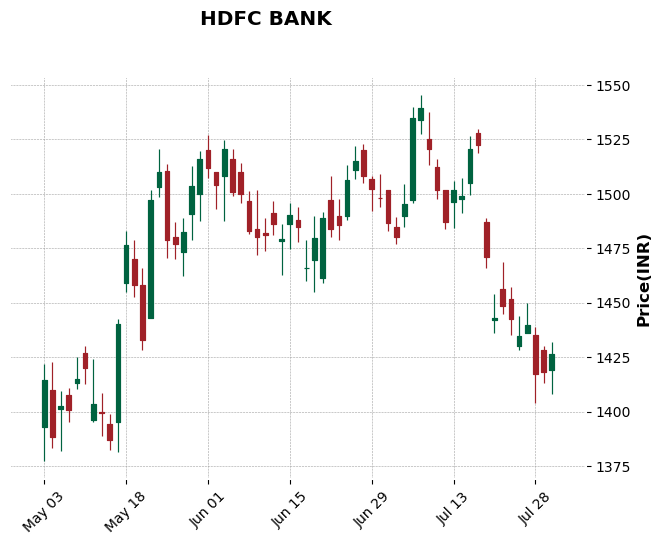

<Figure size 640x480 with 0 Axes>

In [41]:
fplt.plot(
    hdfcyf1,
    type='candle',
    title='HDFC BANK',
    style='charles',
    ylabel='Price(INR)'
    )
plt.savefig('hdfc.png')